In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [5]:
# 1.The data suggest that when there is an increase in procedures that there is a reduction in Length of Stay(LOS).
#  To further explore whether there may be an association between LOS and procedures I will conduct a correlation test

# H₀ (Null Hypothesis): There is no correlation between the number of procedures and LOS.

# H₁ (Alternative Hypothesis): There is a negative correlation (more procedures → lower LOS).

# Import the Data
procedures = pd.read_csv('Procedures by LOS.csv')
procedures.columns = ['num_proc','LOS','ID']
print("Orignial Data")
print(procedures.describe())


Orignial Data
         num_proc         LOS             ID
count  170.000000  170.000000     170.000000
mean     3.529412   15.170588  124253.200000
std      2.839236   13.478463   28150.518058
min      1.000000    0.000000  100003.000000
25%      1.000000    5.000000  100890.250000
50%      3.000000   11.000000  111172.000000
75%      5.000000   21.000000  141739.500000
max     16.000000   71.000000  199757.000000


In [4]:
LOS = procedures['LOS']
num_proc = procedures['num_proc']
corr, p_val = stats.pearsonr(LOS,num_proc)
print(f"Pearson Correlation: {corr}, P-value: {p_val}")

Pearson Correlation: -0.44892243339678367, P-value: 8.251487659395193e-10


There is a negative correlation between the number of procedures and length of stay. However, the results are not significant. 

# 2. During this 10-year time period did Black/African American Individuals Experience Greater Lengths of Stay compared to their White counterparts?
It appears that Black/African American patients, who make up the second-largest ethnic group after White individuals, experience the highest average length of stay (ALOS) among the ethnic groups. Specifically, they have an ALOS of 6.31 hours, which is higher than the overall average of 5.81 hours, and a median LOS of 6 hours, compared to the overall median of 5 hours. This suggests that the data may be impacted by outliers; however, even when considering the median, Black/African American patients consistently experience longer stays compared to other ethnic groups.

- **Null Hypothesis ($H_0$):** There is no difference in ALOS between Black/African Americans and White patients (i.e., $\mu_1 = \mu_2$).
- **Alternative Hypothesis ($H_1$):** Black/African Americans expereince greater lengths of stay than White patients (i.e., $\mu_1 > \mu_2$).


count    30860.000000
mean         5.787200
std          3.993796
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         71.000000
Name: EDLOS, dtype: float64


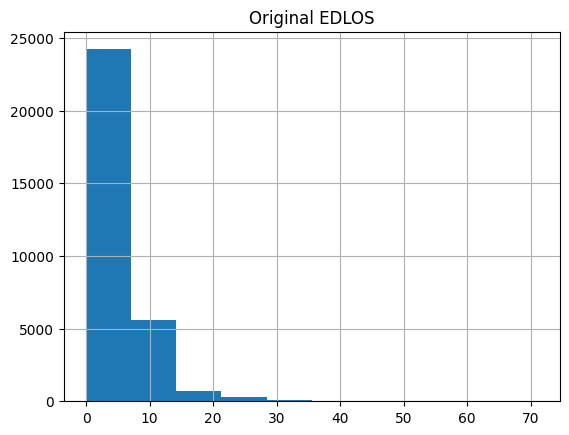

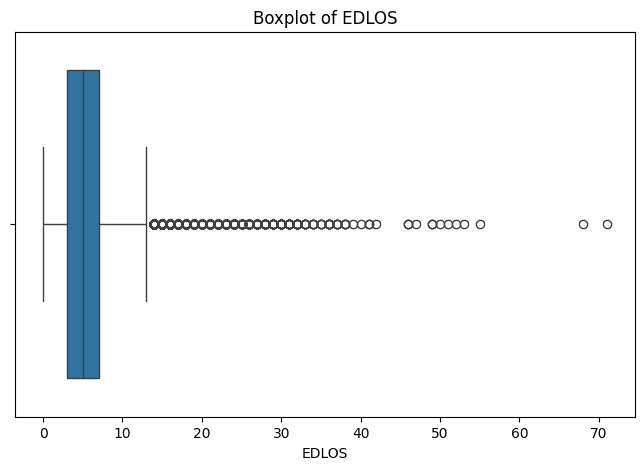

In [76]:
import matplotlib.pyplot as plt
# Import data
eth_df = pd.read_csv('Ethnicity Groups by EDLOS.csv')
eth_df.drop(['HADM_ID','HOSPITAL_EXPIRE_FLAG'],axis=1,inplace=True) # drop unnecessary rows
print(eth_df['EDLOS'].describe())
eth_df['EDLOS'].hist()
plt.title('Original EDLOS')
plt.show()

import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(x=eth_df['EDLOS'])
plt.title('Boxplot of EDLOS')
plt.show()


Due to the data being non-noprmally distributed, I will use a log transformation to see if that helps to improve its distribution. So, that I can conduct a Z-test. I do have some outliers here but these values are not erroneous or impossible to have so I won't remove them from the data. 

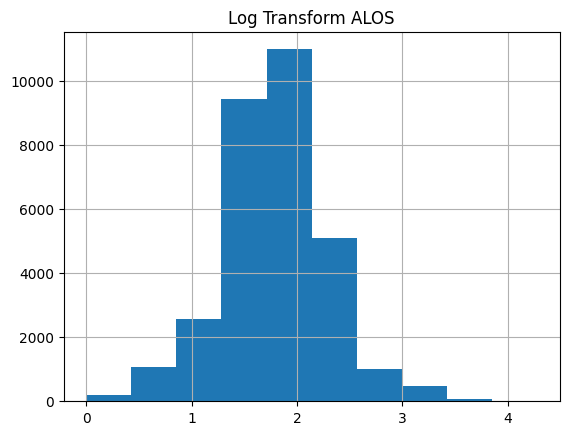

Black/African American patients had a mean of 6.377649325626204 and a median of 5.0 
White/White American patients had a mean of 5.784872176718789 and a median of 5.0 


In [77]:
# Use Log Transform to make the data more normal
eth_df['log_EDLOS'] = np.log1p(eth_df['EDLOS'])
eth_df['log_EDLOS'].hist()
plt.title('Log Transform ALOS')
plt.show()



# Group data edlos columns
b_eth_df = eth_df[eth_df['Ethnicity_Group'] == 'Black/African American']
w_eth_df = eth_df[eth_df['Ethnicity_Group'] == 'White']

# Get Group Proportions
b_prop = len(b_eth_df)/len(eth_df)
w_prop = len(w_eth_df)/len(eth_df)

# Porportinate Sampling  Data Points from each group
b_eth_df = b_eth_df.sample(frac=b_prop,random_state=42)
w_eth_df = w_eth_df.sample(frac=w_prop,random_state=42)

# Show Group Means and Medians
print(f'Black/African American patients had a mean of {b_eth_df['EDLOS'].mean()} and a median of {b_eth_df['EDLOS'].median()} ')
print(f'White/White American patients had a mean of {w_eth_df['EDLOS'].mean()} and a median of {w_eth_df['EDLOS'].median()} ')

In [78]:
# conduct a right tailed z test
from statsmodels.stats.weightstats import ztest
stat,pval = ztest(
    x1 = b_eth_df['log_EDLOS'],
    x2 = w_eth_df['log_EDLOS'],
    alternative = 'larger'
)
print(f'The test statistic is {stat} with a p-value of {pval}')

The test statistic is 3.49978002255652 with a p-value of 0.00023282112346223832


In [73]:
# Convert the means back to normal scale
np.expm1(b_eth_df['log_EDLOS'].mean()) - np.expm1(w_eth_df['log_EDLOS'].mean())

np.float64(0.4772630758083709)

In [80]:
from scipy.stats import mannwhitneyu

stat, pval = mannwhitneyu(b_eth_df['EDLOS'], w_eth_df['EDLOS'], alternative='greater')
print(f"U-Test Statistic: {stat}, P-Value: {pval}")

U-Test Statistic: 4579893.5, P-Value: 9.922704824445516e-05


- **Data Testing:**
    - A **Z-test** was conducted to compare the ALOS between Black/African American and White patients in the Emergency Department. The results suggest that Black/African American patients experience significantly longer lengths of stay compared to White patients. Specifically, the mean ALOS for Black/African Americans was **6.4 hours**, while for White patients, it was **5.8 hours**.
    - The test statistic was **3.50**, and the p-value was **0.0002** (with a 95% confidence interval), indicating that the null hypothesis is rejected. The difference in means between Black/African American and White patients is approximately **47%**.
- **Further Validation with Mann-Whitney U Test:**
    - To validate these findings, a **Mann-Whitney U test** was performed, which does not assume normality in the data. The test returned a **test statistic of 4,579,893.5** and a **p-value of 9.92e-05**. This result suggests a significant difference between the two groups, reinforcing the Z-test results.
- **Conclusion:**
    - Both the Z-test and the Mann-Whitney U test indicate that Black/African American patients experience longer lengths of stay in the Emergency Department compared to White patients, with the difference being statistically significant in both the mean and distribution.